/home/tung6100/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:4186: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


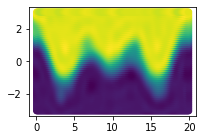

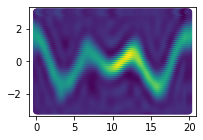

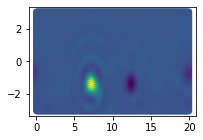

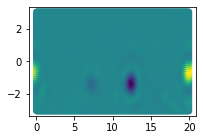

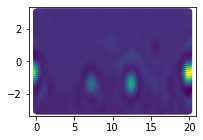

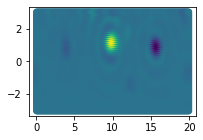

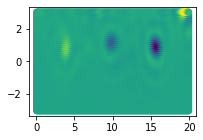

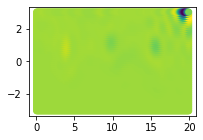

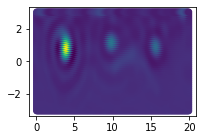

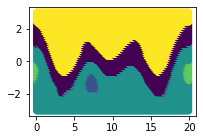

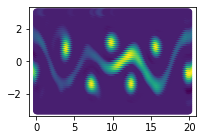

/home/tung6100/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


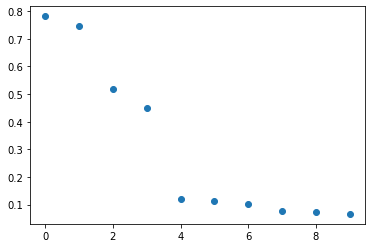

/home/tung6100/.local/lib/python3.8/site-packages/scipy/cluster/vq.py:607: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


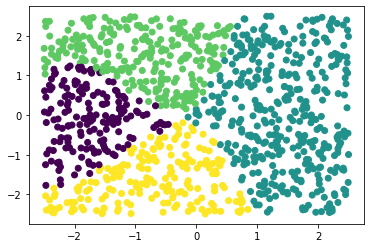

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import scipy as sp
import scipy.io
import scipy.cluster
import matplotlib.pyplot as plt

from addPath import *
addPath()

from d3s import algorithms
from d3s import kernels

plt.ion()

#%% Bickley jet -----------------------------------------------------------------------------------

#%% load variables from mat file into main scope
data = sp.io.loadmat('data/bickley.mat', squeeze_me=True)
for s in data.keys():
    if s[:2] == '__' and s[-2:] == '__': continue
    exec('%s = data["%s"]' % (s, s))

#%% apply kernel CCA to detect coherent sets
sigma = 1
k = kernels.gaussianKernel(sigma)

evs = 9 # number of eigenfunctions to be computed
d, V = algorithms.kcca(X, Y, k, evs, epsilon=1e-3)

#%% plot eigenvectors
for i in range(evs):
    plt.figure(figsize=(3, 2))
    plt.scatter(X[0, :], X[1, :], c=V[:, i])
plt.show()

#%% k-means of eigenvectors
c, l = sp.cluster.vq.kmeans2(np.real(V[:, :5]), 5)
plt.figure(figsize=(3, 2))
plt.scatter(X[0, :], X[1, :], c=l)
plt.show()

#%% seba
S = algorithms.seba(np.real(V))
plt.figure(figsize=(3, 2))
plt.scatter(X[0, :], X[1, :], c=S[:, 0:7].sum(axis=1))
plt.show()

#%% time-dependent 5-well potential ---------------------------------------------------------------

#%% load variables from mat file into main scope
data = sp.io.loadmat('data/moving5well.mat', squeeze_me=True)
for s in data.keys():
    if s[:2] == '__' and s[-2:] == '__': continue
    exec('%s = data["%s"]' % (s, s))

#%% apply kernel CCA to detect coherent sets
evs = 10 # number of eigenfunctions to be computed
d, V = algorithms.kcca(X, Y, k, evs, epsilon=1e-2)

#%% plot eigenvalues
plt.figure()
plt.plot(d, 'o')
plt.show()

#%% k-means of eigenvectors
c, l = sp.cluster.vq.kmeans2(np.real(V[:, 0:5]), 5)
fig = plt.figure()
plt.scatter(X[0, :], X[1, :], c=l)
plt.show()
